In [11]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data

#### Fonctions de calcul de distance provenant de fichiers annexes

Les fonctions de base pour les calculs de distances se trouvent dans les fichiers:
* ```descriptor.py``` pour le calcul des descripteurs, la fonction ```compute_descriptor``` retourne une liste de descripteurs et prend en entrée un signal.
* ```wasserstein_distance.py```: la fonction ```compute_wasserstein_distance``` calcule la distance de Wasserstein entre deux ensembles de signaux. La distance utilisée par défaut est la norme des différences des vecteurs.
* ```kolmogorov_distance.py```: la fonction ```compute_kolmogorov_dist``` calcule la distance du test de Kolmogorov entre deux ensembles de signaux

#### Fonction pour le traitement des données

Les fonctions de base pour le chargement, l'affichage et le traitement des données simulées se trouvent dans le fichier ```data_functions.py``` :
* ```load_data```: chargement des données
* ```plot_data```: Affichage des données

### Chargement des données de simultion de poumons

Time horizon: 36
Number of simulations: 100


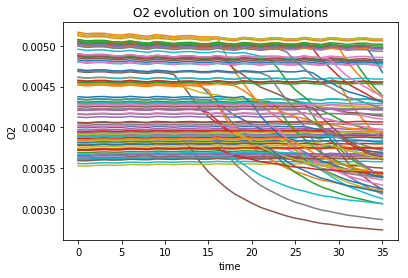

Time horizon: 36
Number of simulations: 100


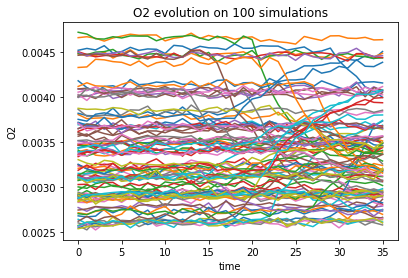

In [2]:
nb_sim1, T1, df1 = load_data("./data/out_O2.csv")
plot_data(df1)

nb_sim2, T2, df2 = load_data("./data/out_O2_taub.csv")
plot_data(df2)

### Comparaison des distances 

In [3]:
start_time = time.time()
kolm_dist = compute_kolmogorov_dist(df1, df2)

exec_time = time.time() - start_time
print("Kolmogorov distance: {} (execution time: {} min)".format(kolm_dist, round(exec_time / 60, 4)))

Kolmogorov distance: 0.20000000000025647 (execution time: 0.0015 min)


In [4]:
start_time = time.time()
wasser_dist = compute_wasserstein_distance(df1, df2)

exec_time = time.time() - start_time
print("Wasserstein distance: {} (execution time: {} min)".format(wasser_dist, round(exec_time / 60, 4)))

Kolmogorov distance: 0.02985999849216584 (execution time: 0.7138 min)


### Comparer sur un ensemble plus large de données simulées

In [22]:
def compute_dist_sets(sets):
    distances = []
    
    for df1 in tqdm(sets):
        for df2 in sets:
            kolm_dist = compute_kolmogorov_dist(df1, df2)
            wasser_dist = compute_wasserstein_distance(df1, df2)
            distances.append([kolm_dist, wasser_dist])
            
    return np.array(distances)

#### Test un peu bateau juste pour tester, ils ont tous la même taille pour commencer
TO DO: Wasserstein ne fonctionne pour l'instant qu'avec des ensemble de même taille, il faut que je me penche sur la librairie pour voir si je peux changer ça

In [23]:
var1 = [col for col in list(df1.columns) if 'V' in col]
var2 = [col for col in list(df2.columns) if 'V' in col]

df3 = df1[var1[:50]]
df4 = df1[var1[50:]]
df5 = df2[var2[:50]]
df6 = df2[var2[50:]]

df3.shape, df4.shape, df5.shape, df6.shape 

((36, 50), (36, 50), (36, 50), (36, 50))

In [24]:
start_time = time.time()
distances = compute_dist_sets([df3, df4, df5, df6])

print("Execution time (min):", round((time.time() - start_time) / 60, 4))

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:38<00:00,  9.60s/it]


Execution time (min): 1498747619.5832


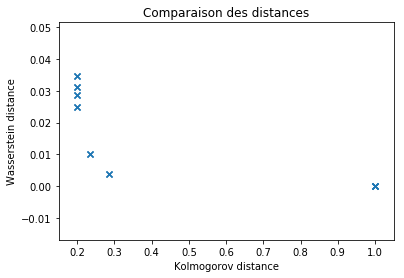

In [34]:
plt.scatter(distances[:, 0], distances[:, 1], marker='x')
plt.xlabel("Kolmogorov distance")
plt.ylabel("Wasserstein distance")
plt.title("Comparaison des distances")
plt.show()

In [33]:
distances

array([[ 1.        ,  0.        ],
       [ 0.28427013,  0.00372808],
       [ 0.20000008,  0.03467037],
       [ 0.20000009,  0.02858187],
       [ 0.28427013,  0.00372808],
       [ 1.        ,  0.        ],
       [ 0.20000073,  0.03113829],
       [ 0.20000293,  0.02504977],
       [ 0.20000008,  0.03467037],
       [ 0.20000073,  0.03113829],
       [ 1.        ,  0.        ],
       [ 0.23490795,  0.0099713 ],
       [ 0.20000009,  0.02858187],
       [ 0.20000293,  0.02504977],
       [ 0.23490795,  0.0099713 ],
       [ 1.        ,  0.        ]])

Le test de Kolmogorov est une mesure de similarité en fait pas une distance -> Vaut 1 pour des ensemble de signaux identiques.

In [37]:
np.corrcoef(distances[:, 0], distances[:, 1])

array([[ 1.        , -0.74943681],
       [-0.74943681,  1.        ]])